# Workshop #7. Batch-correction and label transfer

## Task 2

Using [Cellxgene Portal](https://cellxgene.cziscience.com/) choose the dataset of your scientific interest (keep only 5-6 batches) and try to reproduce the clustering with corresponding cell types. Does it agree with provided cell type annotation?

In [2]:
import scanpy as sc

In [ ]:
# Example of loading a dataset from Cellxgene (adjust URL and filename accordingly)
!wget -O cellxgene_data.h5ad https://datasets.cellxgene.cziscience.com/43748e13-e24e-4d92-9848-5544596cdd34.h5ad

# Load the data
adata_cellxgene = sc.read_h5ad("cellxgene_data.h5ad")

# Preprocess the data
sc.pp.calculate_qc_metrics(adata_cellxgene, inplace=True)
adata_cellxgene = adata_cellxgene[adata_cellxgene.obs.n_genes_by_counts >= 200, :]
sc.pp.normalize_total(adata_cellxgene, target_sum=1e4)
sc.pp.log1p(adata_cellxgene)
sc.pp.highly_variable_genes(adata_cellxgene, n_top_genes=3000)

# Filtering the highly variable genes
adata_cellxgene = adata_cellxgene[:, adata_cellxgene.var.highly_variable]

# Scaling and PCA
sc.pp.scale(adata_cellxgene, max_value=10)
sc.pp.pca(adata_cellxgene)

# Compute neighbors and UMAP
sc.pp.neighbors(adata_cellxgene)
sc.tl.umap(adata_cellxgene)

# Clustering
sc.tl.leiden(adata_cellxgene)


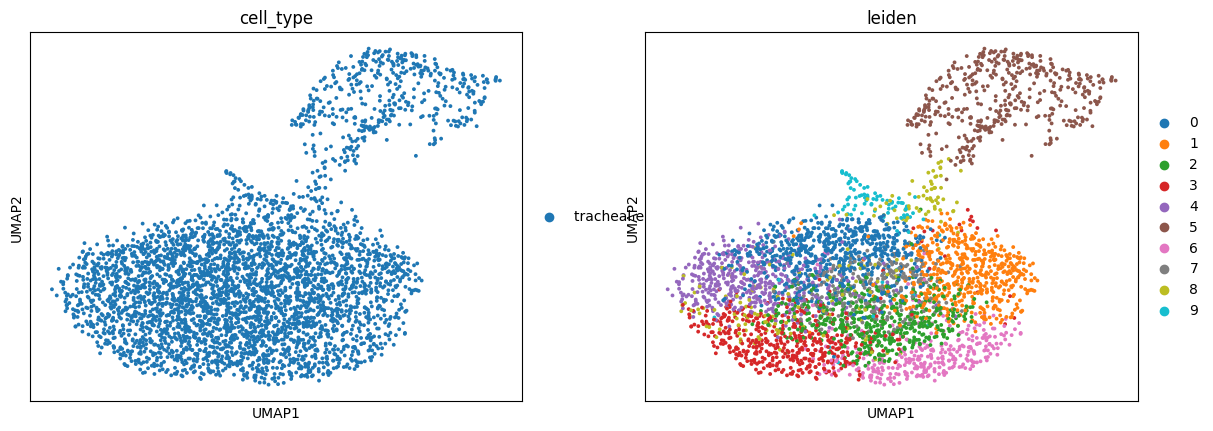

In [5]:
sc.pl.umap(adata_cellxgene, color=["cell_type", "leiden"])

No, cluster are veeeery different from the annotation :)